# Latihan Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data
### Memuat tabel customers
Data pertama yang harus kita muat ialah data dari tabel customers. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


### Load tabel orders
Data selanjutnya yang harus kita muat ialah data dari tabel orders. Hal ini dapat dilakukan dengan menjalankan kode berikut.

In [3]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


### Memuat tabel product
Tabel berikutnya yang harus kita muat ialah tabel product. Berikut merupakan kode yang dapat digunakan untuk membuat tabel product menjadi sebuah DataFrame bernama product_df.

In [4]:
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


### Load tabel sales
Last but not least, tabel terakhir yang harus kita muat ialah tabel sales. Berikut merupakan contoh kode untuk melakukannya.

In [5]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## Assessing Data
Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. Seperti yang telah kita bahas sebelumnya, pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

### Menilai Data customers_df

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


terdapat sedikit perbedaan pada jumlah data pada kolom gender. Hal ini menunjukkan adanya missing values pada kolom gender.

In [7]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

menunjukkan bahwa terdapat 18 missing values pada kolom gender. Hal ini akan kita tangani pada tahap data cleaning nanti.

selanjutnya yang harus kita periksa ialah duplikasi data.


In [8]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  6


memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe().

In [9]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


### Menilai Data orders_df

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


jumlah data pada orders_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [11]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada orders_df.

### Menilai Data product_df

In [12]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam product_df.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

In [13]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df. Pada tahap cleaning data, kita akan menghapus duplikasi tersebut.

### Menilai Data sales_df

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


tidak ada masalah pada tipe data tiap kolom dalam sales_df. Namun, terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut.

In [15]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

dapat disimpulkan bahwa terdapat 19 missing value pada kolom total_price. Hal ini akan kita bersihkan pada tahap cleaning data.

In [16]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

Jumlah duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


tidak ada duplikasi pada sales_df.

| DataFrame    | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value |
|-------------|-----------|---------------|----------------|------------------|
| **customer_df** | - | Terdapat 18 missing values pada kolom `gender`. | Terdapat 6 data yang duplikat. | Terdapat inaccurate value pada kolom `age`. |
| **orders_df** | Terdapat kesalahan tipe data untuk kolom `order_date` & `delivery_date`. | - | - | - |
| **product_df** | - | - | Terdapat 6 data yang duplikat. | - |
| **sales_df** | - | Terdapat 19 missing value pada kolom `total_price`. | - | - |

## Cleaning Data

### Membersihkan Data customers_df
Berdasarkan hasil proses assessing data, diketahui bahwa terdapat tiga masalah yang dijumpai dalam customer_df, yaitu duplicate data, missing value, dan inaccurate value.

#### menghilangkan duplicate data

In [17]:
customers_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menangani missing value
Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [18]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Musabab kolom gender merupakan kolom kategorik, kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut. Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.

In [19]:
customers_df.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

In [20]:
customers_df.fillna(value="Prefer not to say", inplace=True)

customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

#### Menangani inaccurate value
Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom age. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.

In [21]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut.

In [22]:
customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), 70)

customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [23]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.323676,5000.693307
std,289.013599,22.665946,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,500.000000,9998.000000


### Membersihkan Data orders_df
Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_date & delivery_date.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom order_date & delivery_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan contoh kode untuk melakukannya.

In [24]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

Kode di atas akan mengubah tipe data pada kolom order_date & delivery_date menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


### Membersihkan Data product_df
Sesuai hasil assessing data sebelumnya, kita mengetahui bahwa terdapat 6 data yang terduplikasi pada product_df. Untuk mengatasi hal ini, kita perlu membuang data yang sama tersebut menggunakan method drop_duplicates() seperti contoh berikut.

In [26]:
product_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


### Membersihkan Data sales_df
Berdasarkan hasil penilain data sebelumnya, diketahui bahwa terdapat 19 missing value pada kolom total_price. Untuk mengetahui proses penanganan missing value yang paling sesuai, kita perlu melihat terlebih dahulu baris data yang mengandung missing value tersebut.

In [27]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price. Berikut merupakan contoh penerapan kode untuk melakukannya.

In [28]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

Kode di atas akan mengatasi seluruh missing value serta memastikan nilai pada kolom total_price telah sesuai.

In [29]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# Eksplorasi Data

## Eksplorasi Data customers_df

In [30]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,East Sophia,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,50.323676,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,22.665946,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun.

In [31]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id  age                          
                      nunique  max min       mean        std
gender                                                      
Female                    115   79  20  49.147826  16.646607
Male                      143   80  20  51.230769  18.462635
Prefer not to say         742  500  20  50.331090  24.170178

pivot table. Ia memuat informasi jumlah pelanggan (nunique dari customer_id) serta parameter umur yang dikelompokkan berdasarkan jenis kelamin

In [32]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan         3
East Sophia        3
New Ava            3
Lake Rose          2
Chloeville         2
                  ..
Youngview          1
Zacharyborough     1
Andersonchester    1
Zacshire           1
Ameliaview         1
Name: customer_id, Length: 961, dtype: int64

In [33]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

## Eksplorasi Data orders_df

In [34]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

Setelah menjalankan kode di atas, Anda akan menemukan kolom baru pada DataFrame orders_df seperti berikut.
Untuk memperoleh rangkuman parameter statistik dari data orders_df, kita bisa menggunakan method describe() seperti contoh kode berikut.

In [35]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari.

## Eksplorasi Data orders_df dan customers_df
Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali.

In [36]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
219,220,fulan 220,Prefer not to say,79,566 Kiara RunApt. 417,1993,West Zacharybury,Western Australia,Australia,Non Active
168,169,fulan 169,Female,72,5135 Leah RoadSuite 306,7210,South Georgia,Western Australia,Australia,Active
67,68,fulan 68,Female,23,373 Little JunctionApt. 299,6751,West Justin,Western Australia,Australia,Active
505,505,fulan 505,Prefer not to say,63,4920 Justin ParadeApt. 209,4931,Chloefort,Tasmania,Australia,Non Active
207,208,fulan 208,Prefer not to say,71,814 Jayden MewsSuite 958,994,Josephland,South Australia,Australia,Active


In [37]:
customers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya.

In [38]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


### Jumlah order berdasarkan kota

In [39]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Port Hannahburgh,5
3,Lake Rose,5
4,O'keefeton,5
5,East Max,5
6,Rubyfort,5
7,West Kai,5
8,Sarahstad,4
9,Russelstad,4


### Jumlah order berdasarkan state

In [40]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Victoria                        118
Australian Capital Territory    118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

### Jumlah order berdasarkan gender

In [41]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

### Jumlah order berdasarkan kelompok usia

In [42]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

## Eksplorasi Data product_df dan sales_df

In [43]:
product_df.describe(include="all")
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar.

In [44]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
672,666,Jacket,Parka,S,red,119,66,"A red coloured, S sized, Parka Jacket"
673,667,Jacket,Parka,M,red,119,56,"A red coloured, M sized, Parka Jacket"
674,668,Jacket,Parka,L,red,119,73,"A red coloured, L sized, Parka Jacket"
675,669,Jacket,Parka,XL,red,119,64,"A red coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1222,1216,Trousers,Pleated,S,indigo,90,41,"A indigo coloured, S sized, Pleated Trousers"
1229,1223,Trousers,Pleated,L,violet,90,48,"A violet coloured, L sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"


Dapat dilihat bahwa produk termahal ialah item jaket bernama Parka dan yang termurah bernama Bomber.

In [45]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table di atas dapat memberikan kita gambaran terkait produk yang dijual oleh Dicoding Collection.

In [46]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya.

In [47]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan.

In [48]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.

## Eksplorasi Data all_df

In [49]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [50]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya.

In [51]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

pivot table di atas dapat memberikan kita gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia.

## Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [52]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\3954910360.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


melakukan resample data order_date menjadi bulanan serta melakukan agregasi terhadap data tersebut untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.

C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\767054930.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({


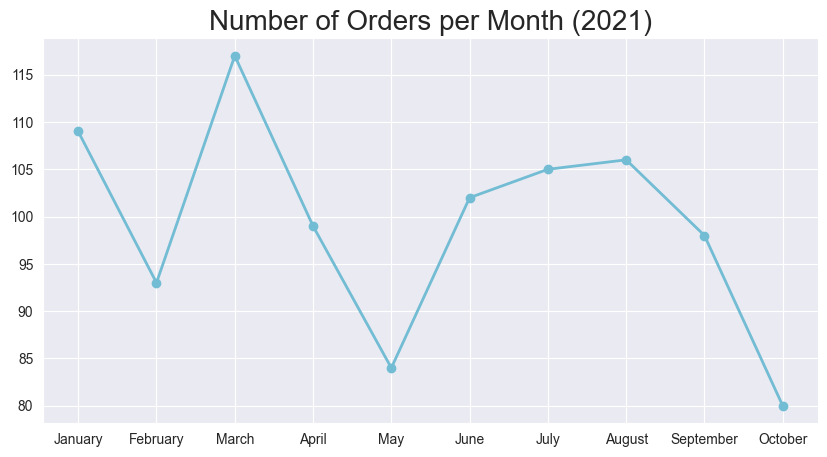

In [53]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

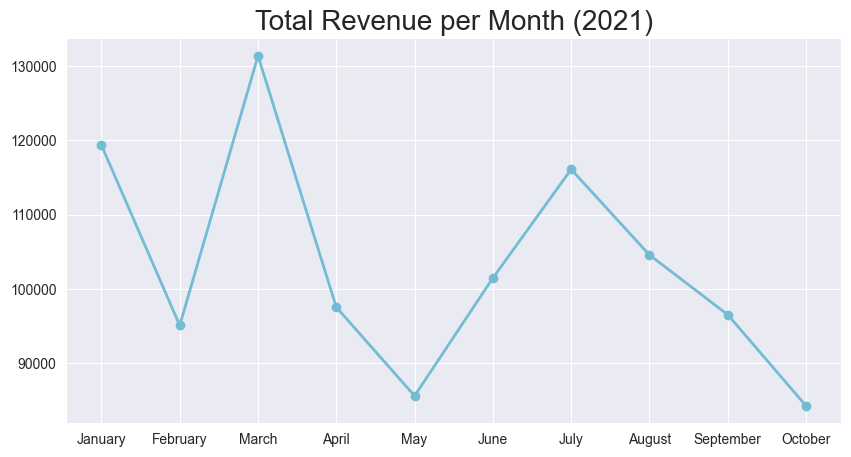

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [55]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\2123652784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\2123652784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])


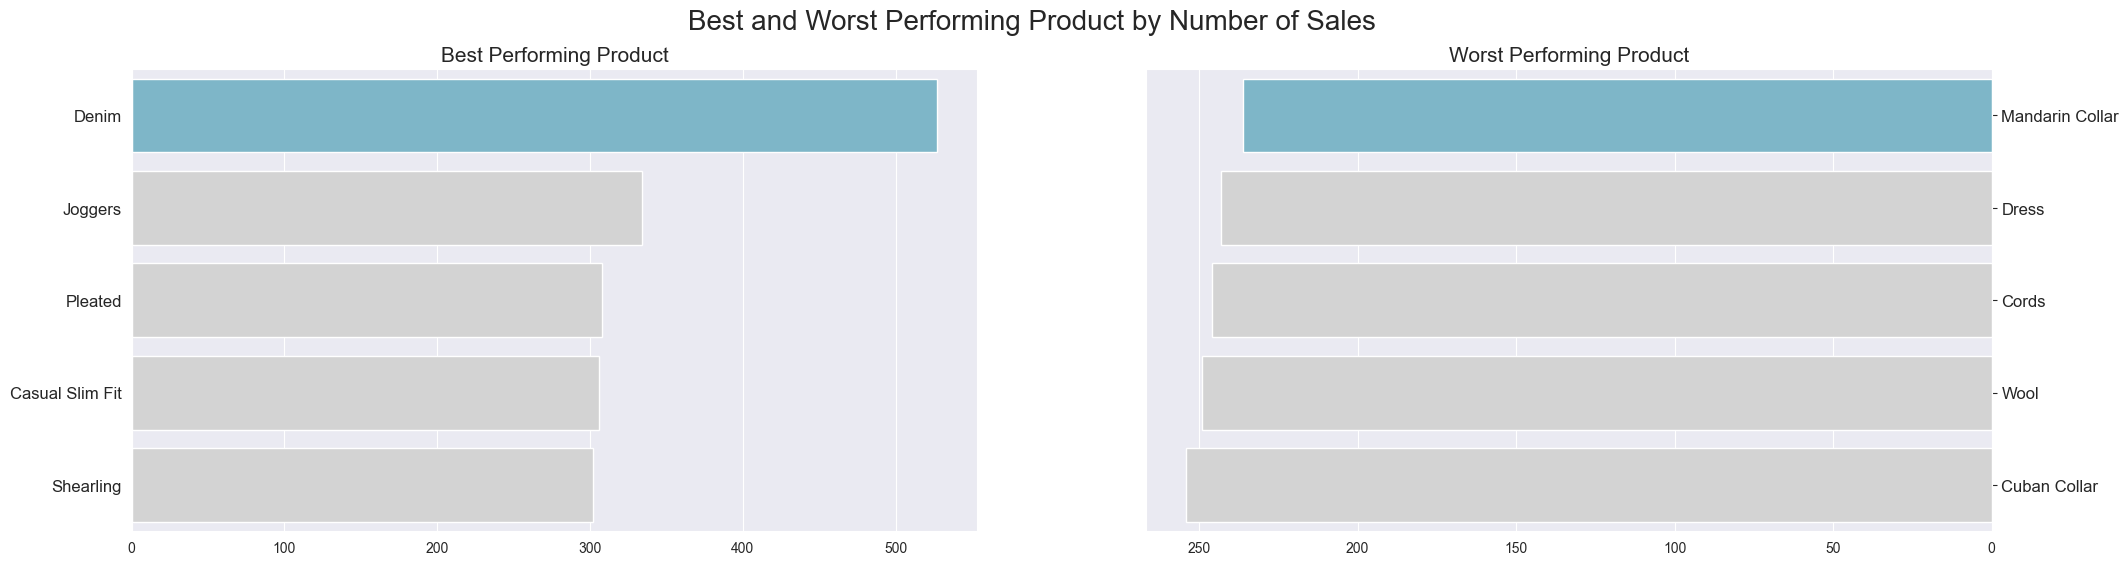

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


## Bagaimana Demografi Pelanggan yang Kita Miliki?

### Berdasarkan gender

C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1462734465.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1462734465.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


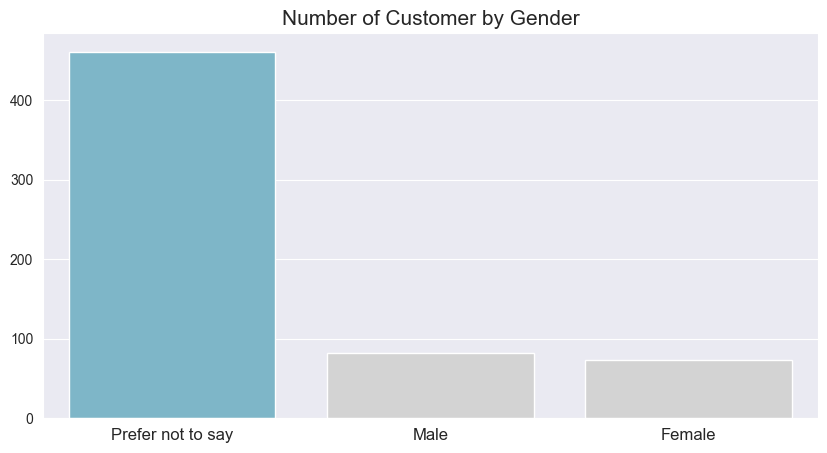

In [57]:
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Berdasarkan age

In [58]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\3461336139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\3461336139.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


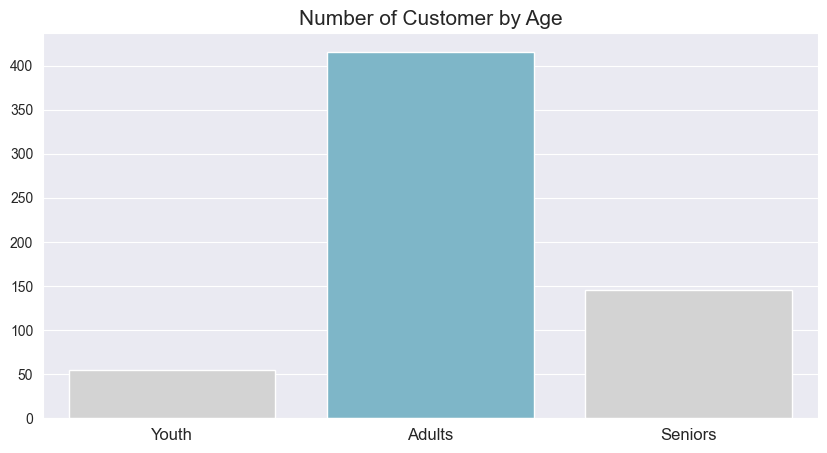

In [59]:
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Berdasarkan states

C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1131602008.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


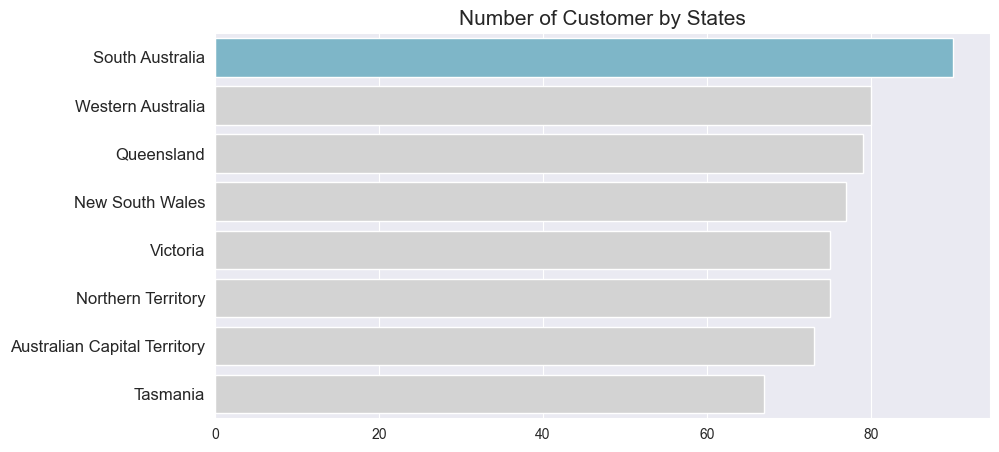

In [60]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## RFM Analysis
RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

In [61]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berikut.

C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1311963083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1311963083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Rucirasatti N\AppData\Local\Temp\ipykernel_1660\1311963083.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

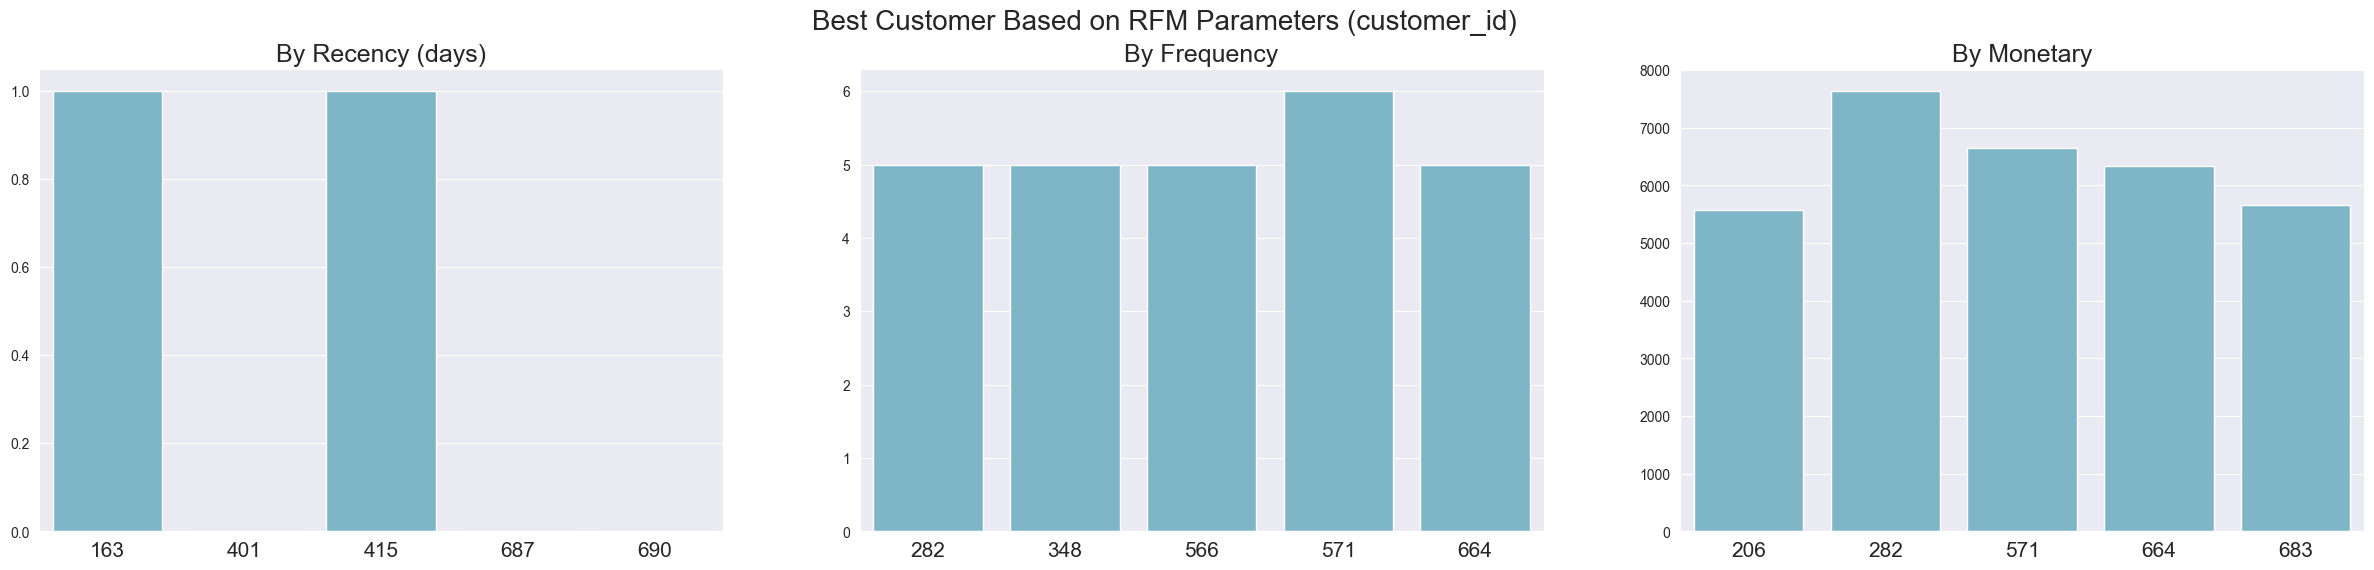

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut

In [64]:
all_df.to_csv("all_data.csv", index=False)